# Conhecendo os dados

Trabalharemos com um conjunto de dados real, a avaliação de diversos filmes por usuários da internet, do [MovieLens](http://grouplens.org/datasets/movielens). O site abriga variações destes dados, que podem ser baixados sob licença de uso. Existem versões de 20 milhões, 100 mil, 27 milhões de notas (*ratings*) para filmes, e por aí vai.

Neste curso optaremos pelo arquivo contendo 100 mil. Cada versão disponibilizada pelo site é atualizada periodicamente, então, se baixarmos uma delas hoje, provavelmente dali um tempo o mesmo arquivo terá notas e filmes diferentes. Isso porque trata-se de uma amostra aleatória para análise.

> A exata versão que usaremos neste curso pode ser baixada neste link.
> 

Após o download e descompactação, usaremos inicialmente o arquivo `ratings.csv`, com as avaliações organizadas em uma tabela cujos cabeçalhos são: "userId", "movieId", "rating" e "timestamp", ou seja, usuário, filme avaliado, nota e o momento em que ela foi atribuída no site, respectivamente. Na nossa análise apenas as três primeiras colunas nos interessam.

Ao abrirmos o arquivo, notaremos que os números são separados por vírgulas, pois CSV remete a ***comma-separated values***. E é este o arquivo que queremos ler para analisar os dados.

No Python, existe uma biblioteca com um módulo feito para a leitura de arquivos neste formato, o [Pandas](https://pandas.pydata.org/). Solicitaremos sua importação, e então a leitura do arquivo CSV:

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv("data/ratings.csv")

Rodaremos o código com "Shift + Enter", mas nos depararemos com uma mensagem informando que o arquivo `.csv` não foi encontrado. Claro, pois ele se encontra na nossa máquina local, enquanto o código está sendo rodado no *cloud*. Caso você rode o código no Jupyter da sua máquina, basta que ele esteja no mesmo diretório, com o *path* adequado. Caso o arquivo esteja na nuvem do Google, como o subiremos?

Clicaremos na aba escura com um **`>`**, localizada na extrema esquerda da tela, em "Files" e "Upload". Será exibida uma mensagem indicando que os arquivos são deletados toda vez que zeramos a nossa *runtime*, após o qual o nosso arquivo é listado. Rodaremos tudo mais uma vez e, agora sim, o arquivo é lido e trazido com sucesso.

São muitas informações, portanto atribuiremos tudo isso a `notas` e, em vez de todas, pediremos para que apenas as cinco primeiras avaliações sejam exibidas, isto é, a "cabeça" (*head*) da lista de elementos:

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


primeiras 5 linhas

Há diversas maneiras de saber quantas avaliações existem, e uma delas é pedir o formato da tabela, com notas.shape. Isto nos retornará a informação de que há 100836 avaliações e 4 colunas. O contador à esquerda, na tabela, será denominado índice, que não consideramos como sendo uma coluna.

quantas linha e colunas

In [4]:
notas.shape

(100836, 4)

Continuando, caso queiramos trabalhar com o português, e não inglês, alteraremos os nomes das nossas colunas com o atributo columns:

In [5]:
notas.columns = ["IDUsuario","IDFilme", "nota", "momento"]

Feita esta redefinição, solicitaremos a impressão dos dados com notas.head(), na mesma célula. Assim sendo, notas é um objeto do Pandas com várias colunas e 0 ou várias linhas, um tipo conhecido como Pandas DataFrame, cuja documentação corrente (versão 0.24.1) indica suas inúmeras possibilidades.

In [6]:
notas.head()

,IDUsuario,IDFilme,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


De maneira rápida, o que conseguimos analisar com o que temos até aqui?

A coluna "nota" contém os valores `4.0` e `5.0`, mas será que eles são únicos? Para consultarmos todos os valores desta coluna, digitaremos e rodaremos o seguinte código:

In [7]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

> Observe que temos como saída uma série.

Já entendemos que são `100836` valores, e anteriormente os dados eram impressos de forma visualmente agradável, em uma tabela, por ser um *dataframe*. Agora que solicitamos uma única coluna, por padrão, ela será uma **série de números**, que chamamos de ***Pandas Series***. Trata-se de uma série de dados, e de acordo com sua [documentação](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), ela também fornece uma grande quantidade de possibilidades.

Por exemplo, para sabermos quais são os valores colocados nesta coluna de maneira única, utilizamos `unique()`. Ao usarmos o código `notas['nota'].unique()`, e o rodarmos com "Shift + Enter", o retorno será:

In [8]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Vendo os valores ordenados:

In [9]:
valores_unicos = notas["nota"].unique()
valores_unicos.sort()
valores_unicos

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

As notas, portanto, variam de `0.5` a `5`, e a nota `0` não foi dada em nenhum momento. O Pandas serve para a leitura e escrita de um conjunto de dados de diversas maneiras, e também para extrair informações a partir destes dados.

Se quisermos saber quantas vezes uma nota específica aparece nesta coluna, poderemos usar:

In [10]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

Isso imprimirá duas colunas de valores, sendo a primeira com as notas e a segunda a quantidade de vezes que ela foi dada, ordenadas de forma decrescente (do maior para o menor). Para encontrarmos a média destas notas, utilizaremos:

In [11]:
notas['nota'].mean()

3.501556983616962

O que trará o valor 3.501556983616962. Existem outras medidas que serão vistas neste curso, mais ou menos relevantes dependendo do contexto. A seguir, continuaremos explorando tudo isso e mais.

# Visualização e histograma

Nós já aprendemos a carregar os dados com o Pandas e a analisar os valores em um *dataframe* ou uma série, seja em uma tabela ou em um *array*.

Dessa vez, queremos explorar esses mesmos dados, mas de maneira visual. A impressão visual de um conjunto de dados é chamada de "plotar" (*plot*), e o Pandas possui um método `plot()` justamente para isso.

Inicialmente, plotaremos nossa série de dados com `notas.nota.plot()`.

> A declaração notas.nota é uma maneira mais sintática de expressarmos os dados da coluna "nota", e que usaremos ao longo do curso toda vez que estivermos nos referindo aos dados de somente uma coluna.
>

In [12]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [13]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

Plotando as notas

<Axes: >

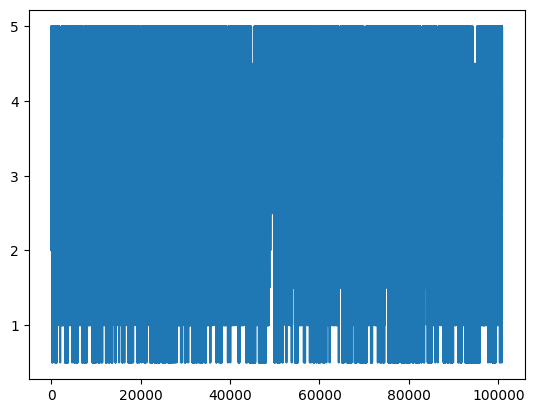

In [14]:
notas.nota.plot()

Esse gráfico não parece fazer muito sentido, não é? As notas realmente estão no `y`, mas o que são os números de `0` a `100.000` no eixo `x`? Por padrão, o gráfico `plot()` de uma série cruza os índices da tabela com os valores da coluna que apontamos (no caso, `nota`), criando pontos para cada resultado. Todos os pontos são, então, ligados por retas, gerando o gráfico ilegível da imagem acima.

Na verdade, queremos saber quantas vezes cada informação aparece nesse conjunto de dados, o que pode ser visualizado em um histograma. Para gerá-lo, usaremos, no método `plot()`, o argumento `kind` com o valor `hist`:

<Axes: ylabel='Frequency'>

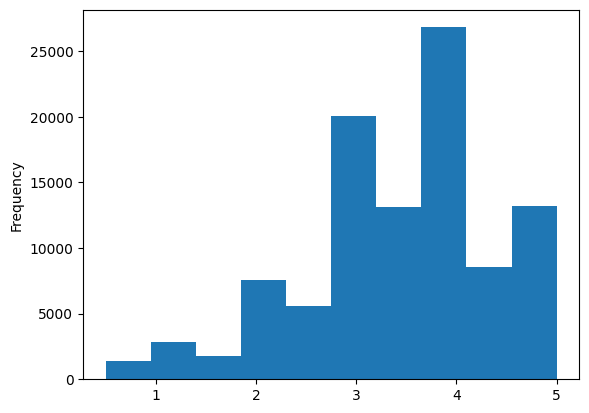

In [15]:
notas.nota.plot(kind='hist')

Adicionando espaços

([<matplotlib.axis.XTick at 0x7f9f5a74e8c0>,
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

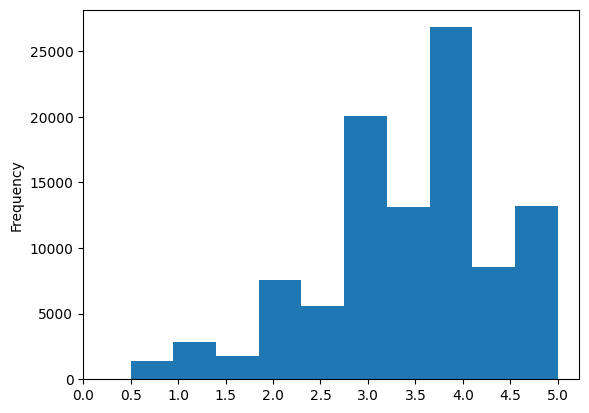

In [16]:
import matplotlib.pyplot as plt

notas.nota.plot(kind='hist')
plt.xticks([0, 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Analisando o histograma, perceberemos que a nota `5` apareceu diversas vezes; a nota `4,5` nem tantas; a nota `4` é a que mais apareceu. Ao longo do curso, iremos explorar nossos dados tanto de maneira numérica, quanto com medidas (por exemplo a média) ou visualizações.

Vamos supor agora que metade das notas do nosso conjunto são maiores que `3`, e a outra metade são menores. Mas e se quiséssemos saber exatamente qual é o valor que divide nossos dados na metade? Esse valor é a mediana ("*median*"). Para efeito de comparação, vamos imprimir tanto a média quanto a mediana na tela.

In [17]:
print(notas.nota.mean(), notas.nota.median())

3.501556983616962 3.5


Como resultado, teremos:

> Média 3.501556983616962
> 
> 
> Mediana 3.5
>

Nesse caso, a mediana foi muito próxima da média, mas isso não é uma garantia. É possível, ainda, tirar essas e outras medidas de uma só vez, pedindo o describe() dessa série (ou de um dataframe):

In [18]:
# mas ja existe uma funcao que faz traz mais informacoes
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Saberemos, assim, que temos `100.836` dados; a média das notas é `3.501557`; o valor mínimo é `0,5`; o máximo é `5`; a mediana é `3.5`; `25%` dos dados (um quartil) estão abaixo de `3`; e outros `25%` estão acima de `4`.

Outra visualização que nos permite analisar esses dados é o *boxplot*, que descreve em uma espécie de "caixa" a posição dos valores plotados. Para gerá-lo, teremos que utilizar outra famosa biblioteca de visualização do Python: o **[Seaborn](https://seaborn.pydata.org/)**.

Primeiramente, importaremos essa biblioteca com `import seaborn as sns` (a importação padrão). Em seguida, chamaremos a função `sns.boxplot()`, passando como parâmetro `notas.nota`. Executando o código, teremos:

In [19]:
import seaborn as sns

<Axes: xlabel='nota'>

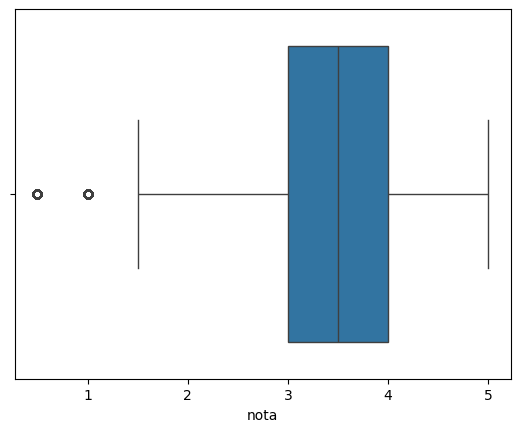

In [20]:
sns.boxplot(notas.nota, orient="h")

A mediana está representada no meio do retângulo azul — ou seja, no `3,5`, dividindo, em duas partes, `50%` dos dados (entre `3` e `3,5`, e entre `3,5` e `4`. Outros `25%` dos nossos dados estão entre `4` e `5`, e o restante está abaixo de `3`.

Com todas essas análises, que tipo de informações podemos extrair? Uma delas é que metade dos usuários (uma parcela muito grande!) deu avaliações entre `3` e `4`, e que as notas entre `0,5` e `1,5` figuram pouco significativamente nessa amostra.

Na estatística, existem diversos tipos de análises e visualizações de dados, e motivos para empregá-las. Já aprendemos algumas, mas se quiser conhecê-las mais a fundo, não deixe conferir nossos cursos de [Data Analysis](https://cursos.alura.com.br/course/data-analysis-trabalhando-com-dados) e [Data Visualization](https://cursos.alura.com.br/course/data-visualization)!

# Analise exploratoria e gráficos

No nosso processo, estamos analisando e explorando os dados por meio de medidas descritivas ou visualizações. Nessa etapa, queremos analisar alguns filmes específicos do conjunto de dados utilizado no curso. Para isso, faremos o upload do arquivo movies.csv, carregaremos esses dados com filmes = pd.read_csv("movies.csv") e exibiremos os 5 primeiros com filmes.head():

In [21]:
filmes = pd.read_csv("data/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Aqui, além da Id de cada elemento, temos o título em inglês (title) e os gêneros do filme (genres), como aventura, animação, comédia e romance. Antes de prosseguirmos, renomearemos as colunas para o português:

In [22]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Para obtermos as notas de um desses filmes — por exemplo, Toy Story —, precisaremos cruzar as informações entre os dataframes notas e filmes. Faremos isso criando uma query (uma "pergunta"), comparando o valor 1 (que corresponde ao filmeId de Toy Story) com a coluna filmeId do dataframe notas.

Para comparações no Python e em outras linguagens, utilizamos o símbolo de igual duas vezes, ==. Isso porque, normalmente, um único = é utilizado para atribuições.

In [23]:
notas

,IDUsuario,IDFilme,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [24]:
notas.query("IDFilme==1")

,IDUsuario,IDFilme,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Como estamos interessados somente na coluna nota, podemos fazer notas.query("filmeId==1").nota para obtermos uma série que contenha todas as notas do filme 1. Em seguida, tiraremos a média desses dados com .mean(), obtendo o resultado 3.92 — um valor acima da média geral desse conjunto (3.5).

In [25]:
notas.query("IDFilme==1").nota.mean()

3.9209302325581397

## Agrupando

Um recurso interessante dos notebooks do Python é a possibilidade de adicionarmos caixas de texto para identificarmos melhor cada etapa do nosso código. Para isso, basta clicar na caixa "+ TEXT" localizada abaixo de cada célula.

Nesse caso, escreveremos "# Analisando algumas notas específicas por filme", utilizando a cerquilha para identificar que se trata de um título, aumentando a fonte do texto. Também adicionaremos o texto "# Analisando as notas em geral" logo no início do nosso código, e "# Analisando os filmes" na etapa em que carregamos o arquivo filmes.csv.

Quando criamos esses títulos, o notebook nos fornece ainda mais uma funcionalidade: "colapsar" todas as células incluídas em uma determinada etapa, o que facilita na identificação e análise dos códigos.

Podemos repetir o processo de exibir as notas e tirar a média para outros filmes da lista, mas fazer isso manualmente seria muito trabalhoso. O que queremos, agora, é agrupar todas as notas pela coluna filmeId:

In [35]:
media_por_filme = notas.groupby("IDFilme").mean().nota
media_por_filme.head()

IDFilme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

O retorno será um objeto do tipo `DataFrameGroupBy` (um agrupamento de valores) do Pandas:

> <pandas.core.groupby.DataFrameGroupBy object at 0x7f7565197d68>


Na [documentação do Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), encontramos alguns exemplos de operações que podem ser feitas a partir desse objeto, como a média!

In [37]:
notas.groupby("IDFilme").mean()


,IDUsuario,nota,momento
IDFilme,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Repare que acabamos não tirando a média somente da nota, mas também do usuarioId e do momento — métricas que não fazem nenhum sentido! Ou seja, é melhor extrairmos somente a coluna nota.

Existem diversas maneiras de fazermos isso, e não podemos nos esquecer de que a coluna filmeID também é importante, já que o índice listado nos indica a qual filme aquela média se refere.

In [47]:
medias_por_filme = notas.groupby("IDFilme").mean()["nota"]
medias_por_filme.head()


IDFilme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Já aprendemos a fazer queries, a filtrar linhas e colunas e a agrupar valores para efetuar operações. Agora, tentaremos plotar esses dados em um gráfico, buscando analisar como essas médias estão distribuídas. Isso pode ser feito com um histograma do Pandas:

<Axes: ylabel='Frequency'>

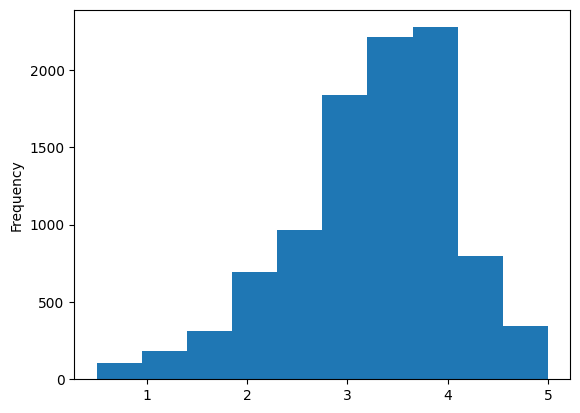

In [48]:
media_por_filme.plot(kind="hist")

Além do Pandas, existem outras bibliotecas gráficas que podem ser utilizadas, como o próprio Seaborn. Com sns.boxplot(medias_por_filme), plotaremos as médias:

<Axes: xlabel='nota'>

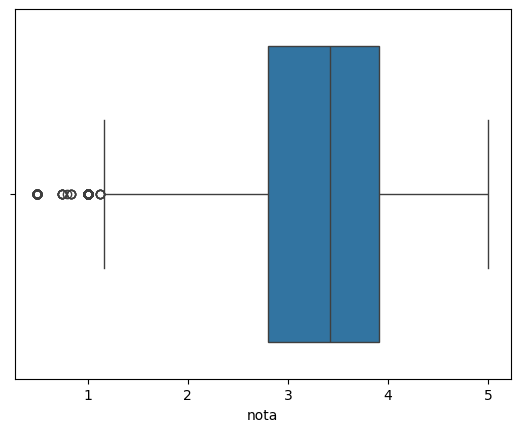

In [49]:
sns.boxplot(media_por_filme,orient='h')

Para nos auxiliar na análise do gráfico, podemos pedir as medidas descritivas desses dados com medias_por_filme.describe():

In [50]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Repare que a mediana das médias é 3.41; 25% delas estão abaixo de 2.8; e outros 25% estão acima de 3.9. O Pandas também é capaz de gerar gráficos boxplot, assim como o Seaborn também é capaz de fazer histogramas. Nesse caso, o histograma do Seaborn é chamado de "gráfico de distribuição, ou distplot(). Atenção: a função distplot() está depreciada e podemos utilizar a função histplot():

<Axes: xlabel='nota', ylabel='Count'>

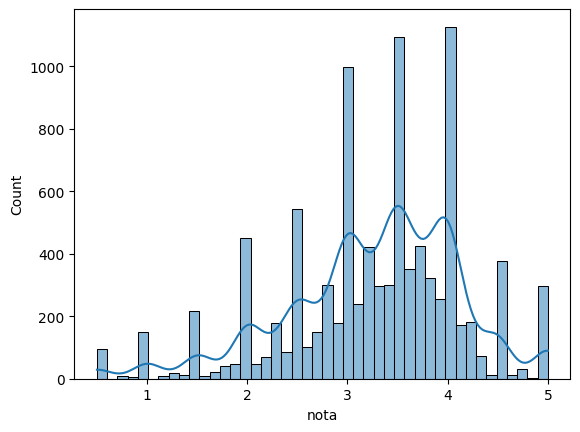

In [52]:
sns.histplot(medias_por_filme, kde=True)

Mas esse histograma parece diferente daquele do Pandas, não? Isso acontece pois o histograma é gerado com base em um número de separações (as barras). No caso do Pandas, tínhamos 10 separações; e no Seaborn, bem mais que isso. Com o argumento bins, podemos definir esse número. Se atribuirmos 10, por exemplo, teremos um histograma praticamente idêntico ao do Pandas:

<Axes: xlabel='nota', ylabel='Count'>

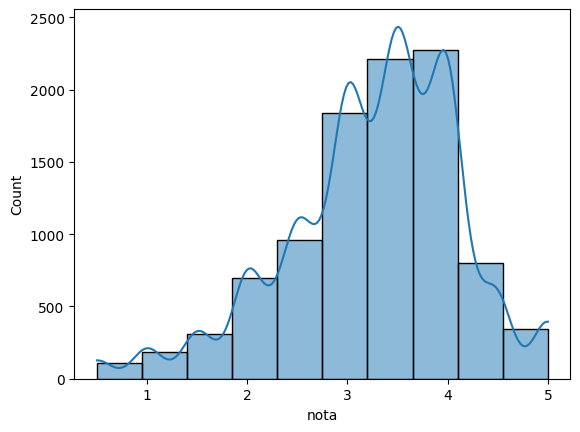

In [53]:
sns.histplot(media_por_filme, kde=True, bins=10)

O interessante a ser apreendido nesse caso é que devemos tomar cuidado na escolha desse parâmetro, já que ela pode influenciar na análise dos nossos dados! Na prática, o Seaborn utiliza algumas fórmulas pré-determinadas para definir uma quantidade de `bins` interessante para o conjunto de dados que lhe foi alimentado.

Note também que, além do histograma, o Seaborn exibe uma curva, que consiste em uma aproximação visual da distribuição dos dados (calculada matematicamente, é claro). Por isso, a curva é mais acentuada entre `3` e `4,5`, por exemplo.

Para gerar esses gráficos, tanto o Seaborn quanto o Pandas utilizam uma biblioteca de baixo nível, chamada **Matplotlib**. Podemos, inclusive, importá-la e utilizar a função `plt.hist()` para plotar nosso histograma na tela:

Text(0.5, 1.0, 'Media filmes')

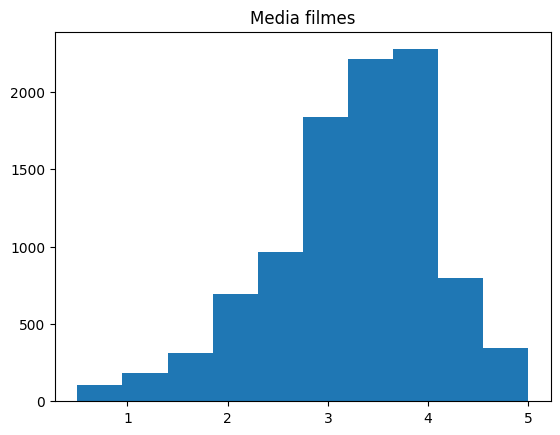

In [54]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title("Media filmes")

Também é possível atribuir configurações como legenda, tamanho dos eixos, cores, entre outras. Inclusive, dentro da ***Data Science***, existe uma área que estuda o trabalho sobre visualizações, chamada ***Data Visualization*** (visualização de dados).

Esse tipo de configuração também pode ser feita no Seaborn: na prática, o *boxplot* costuma ser feito na vertical (eixo `y`), e não na horizontal (eixo `x`).

<Axes: ylabel='nota'>

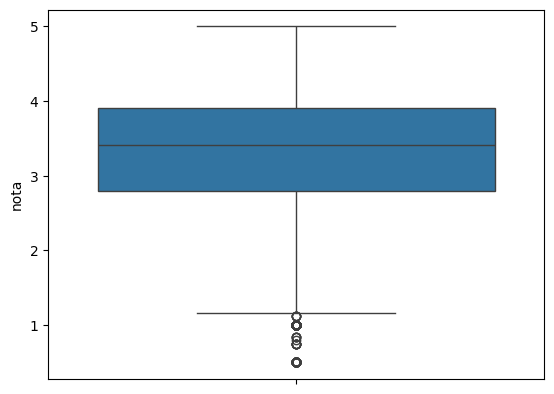

In [55]:
sns.boxplot(y=medias_por_filme)


Outra configuração possível é em relação ao tamanho da imagem. Com a função figure() e o argumento figsize, podemos definir uma proporção para nosso boxplot, como 5x8:

<Axes: ylabel='nota'>

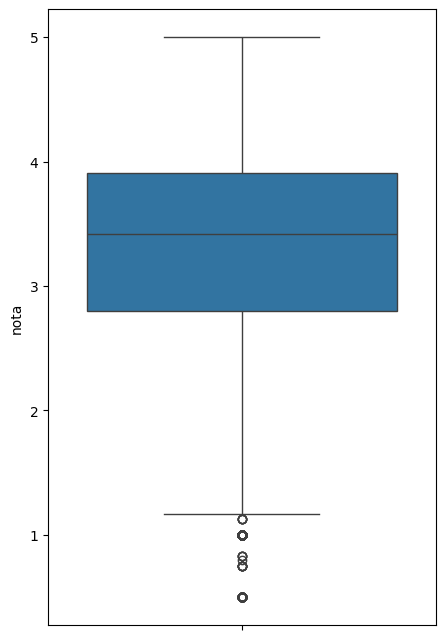

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

Os conhecimentos que aprendemos até agora em relação à exploração de dados em um conjunto serão muito importantes para prosseguirmos com os estudos e, principalmente, para o seu dia-a-dia! Não se esqueça de fazer os exercícios, e até a próxima!